In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})
def show_plot(data_name,start_val = 0):
    
    data = np.load('./expdata/'+data_name)
    val = data['arr_0']
    dec = data['arr_1']
    
    print (val.shape)
    
    st = 15
    user = []
    for i in range(len(dec)):
        if (dec[i] == 1):
            st-=1
        elif (dec[i] == -1):
            st+=1
        user.append(st)
            
    val = np.array(val)
    user = np.array(user)
    
    fig = plt.figure(figsize=(30,10))
    ax1 = plt.subplot(1,2,1)
    plt.plot(np.arange(len(dec)),val)
    #plt.plot(np.arange(len(dec)),user)
    plt.xlabel('epochs')
    plt.ylabel('estimated validation accuracy(%)')
    plt.legend(['estimated validation accuracy'],bbox_to_anchor=(0.6, 1.2))
    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(dec)),user,color='red')
    ax2.set_ylabel('number of virtual clients')
    plt.legend(['num of virtual clients'],bbox_to_anchor=(1.1,1.2))
    plt.title('(a)estimating optimal number of virtual clients')
    plt.ylim(0,16)
    plt.subplot(1,2,2)
    
    cur_user = []
    best_val = []
    for i in range(np.amin(user),np.amax(user)):
        cur_user.append(i)
        this_user_ind = np.arange(len(val))[user==i]
        #print (i,len(this_user_ind),user)
        #this_best_val = np.average(np.sort(val[this_user_ind])[::-1][:10])
        this_best_val = np.average(np.sort(val[this_user_ind])[::-1][:10])
        best_val.append(this_best_val)
        
    #plt.plot([1]+cur_user,[start_val]+best_val,color='green')
    #plt.xlabel('number of virtual clients')
    #plt.ylabel('validation accuracy(%)')
    
    #plt.show()

(800,)


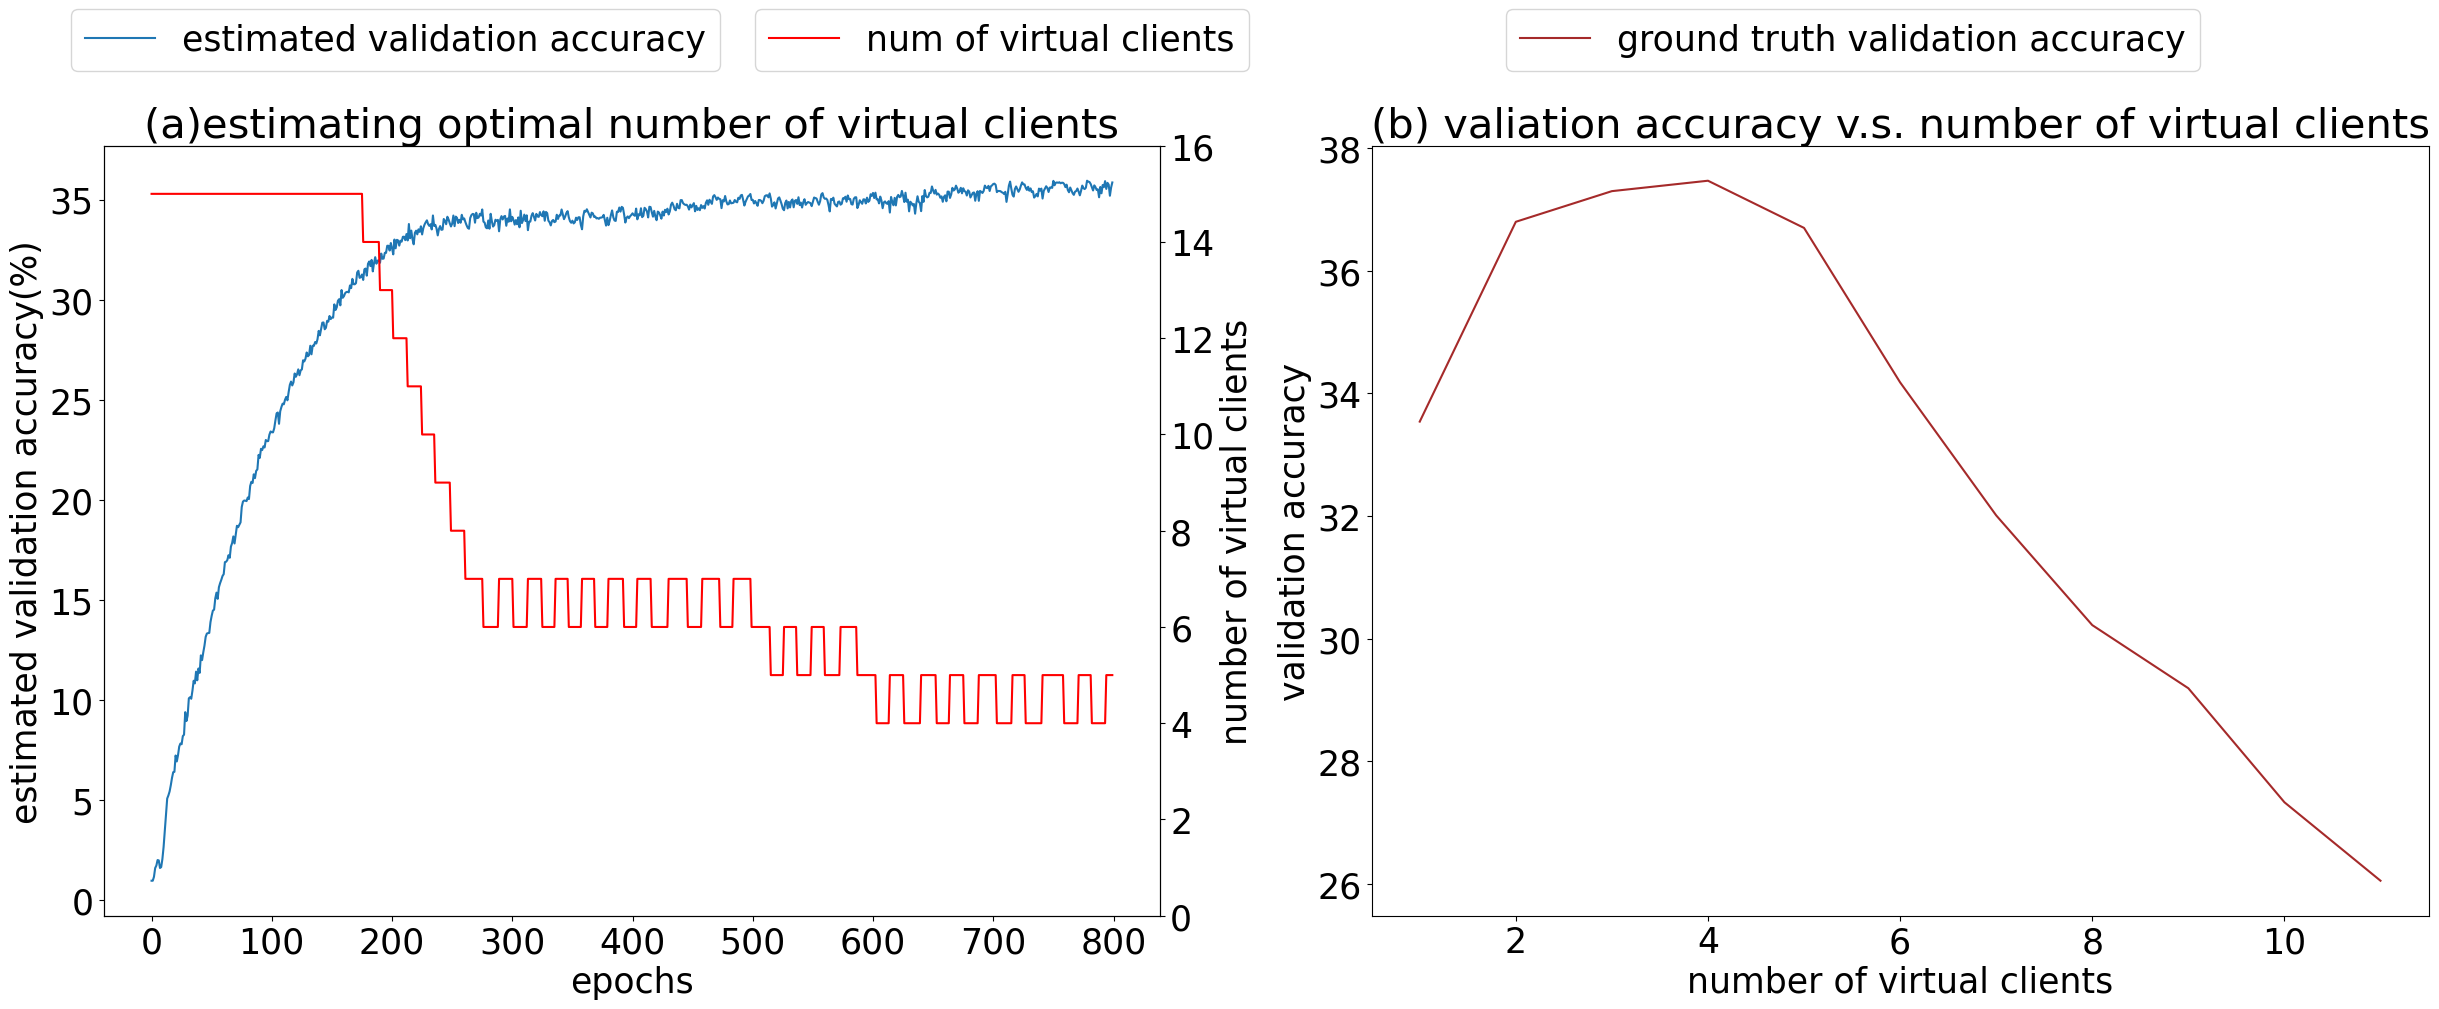

In [88]:
### 15,10 is the correct one.. need to find the correct code

data_name = 'find_best_user_cifar100_alexnet_15_10_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz' ## maybe 15 10
show_plot(data_name,start_val=31.54)

test_acc = [0.3354,0.3680,0.3730,0.3747,0.3670,0.3418,0.3201,0.3022,0.2919,0.2733,0.2605]
test_acc = np.array(test_acc)
plt.plot(np.arange(11)+1,test_acc*100,color='brown')
plt.legend(['ground truth validation accuracy'],bbox_to_anchor=(0.8,1.2),ncol=1)
plt.xlabel('number of virtual clients')
plt.ylabel('validation accuracy')
plt.title('(b) valiation accuracy v.s. number of virtual clients')
plt.savefig('find_opt_num_user.pdf',dpi=800,bbox_inches='tight')
plt.show()

(800,)


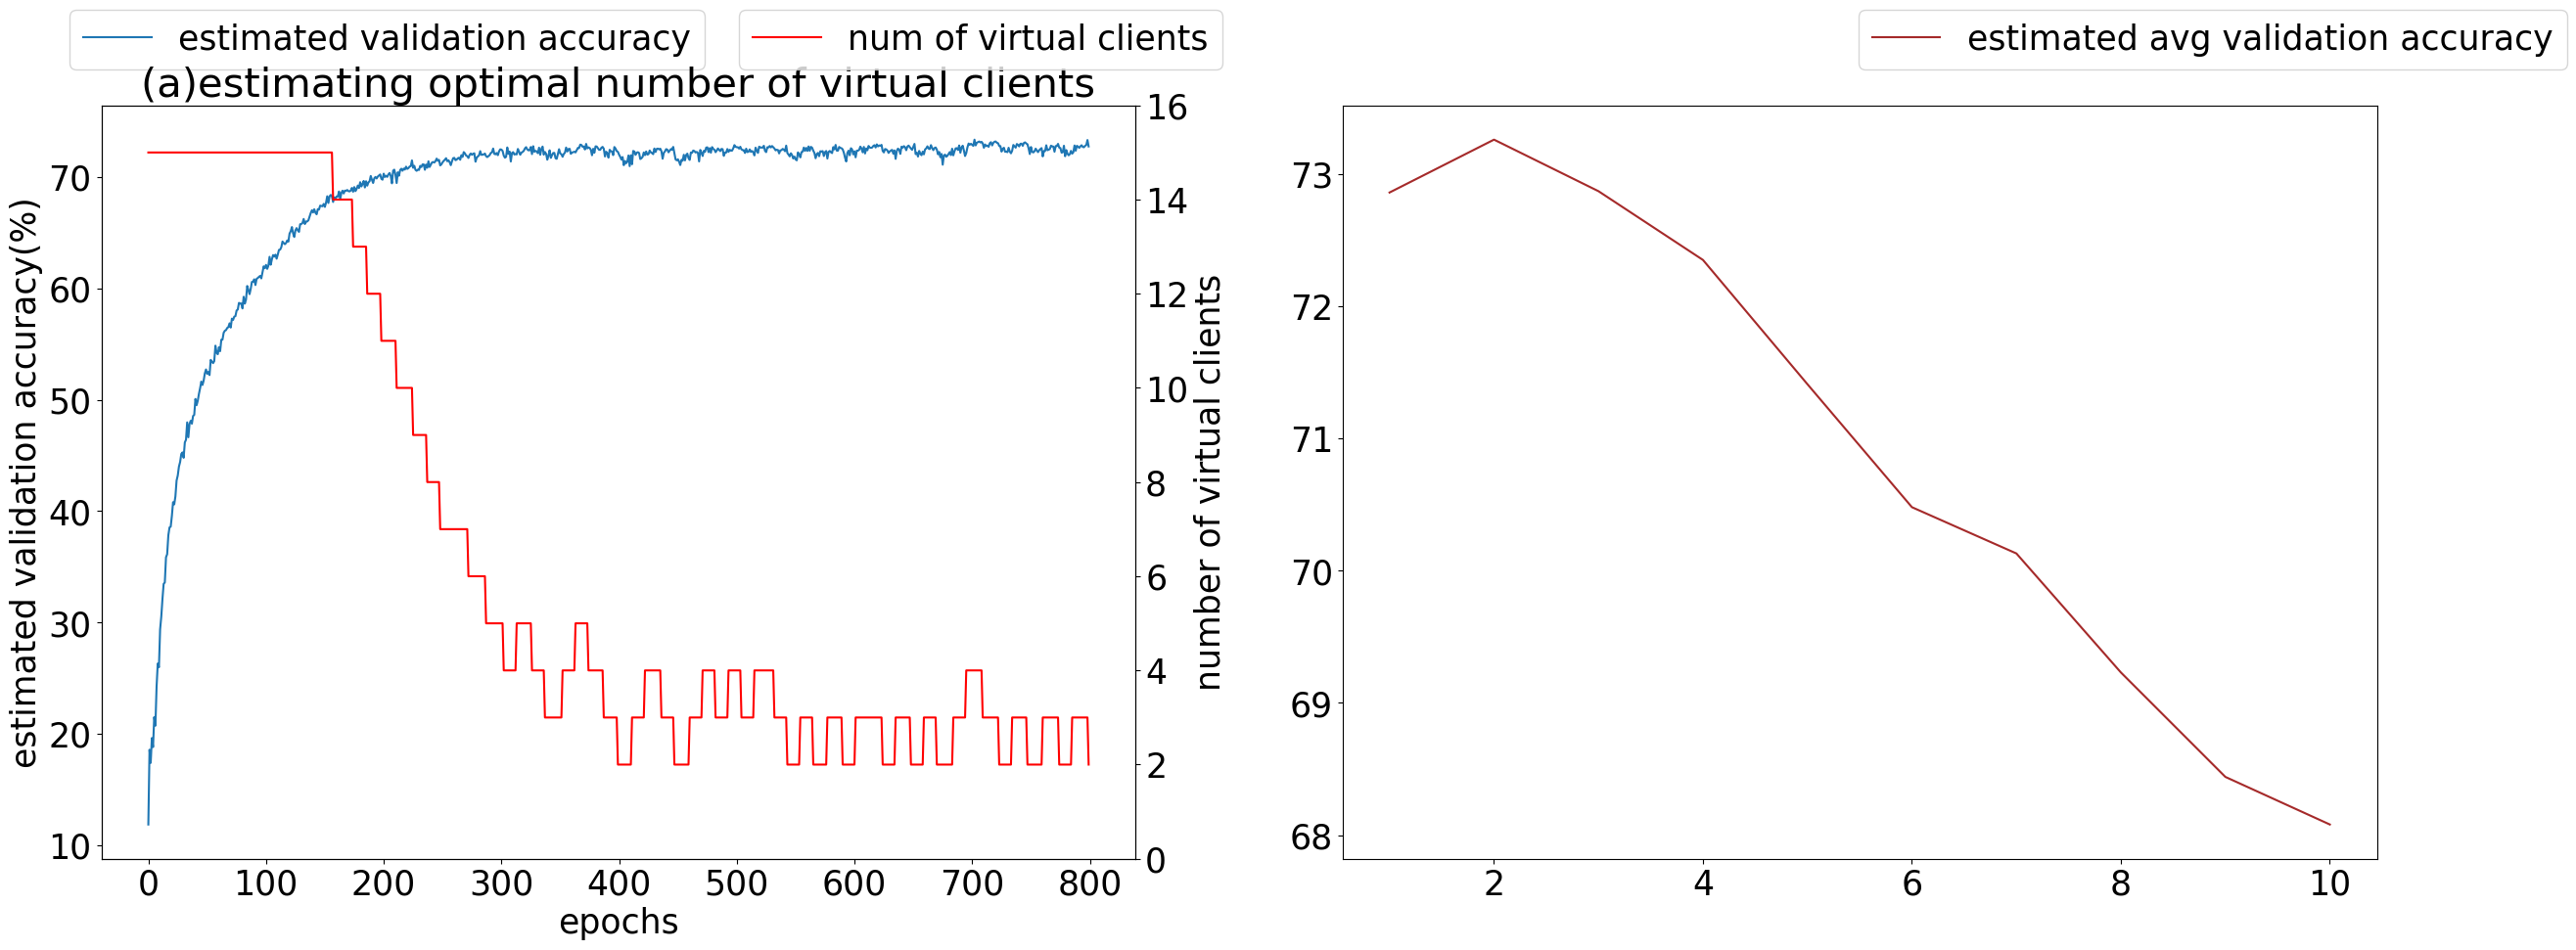

In [84]:
data_name = 'find_best_user_cifar10_alexnet_15_1_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz'
show_plot(data_name,start_val = 69.60)
#data_name = 'inc_find_best_user_cifar10_alexnet_2_100_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz'
#show_plot(data_name)
test_acc = [72.86,73.26,72.87,72.35,71.41,70.48,70.13,69.23,68.44,68.08]
test_acc = np.array(test_acc)
#fig = plt.figure(figsize=(7,5))
plt.plot(np.arange(10)+1,test_acc,color='brown')
plt.legend(['estimated avg validation accuracy','real validation accuracy'],bbox_to_anchor=(1.2,1.15),ncol=2)
#plt.savefig('find_opt_num_user.pdf',dpi=800,bbox_inches='tight')
plt.show()

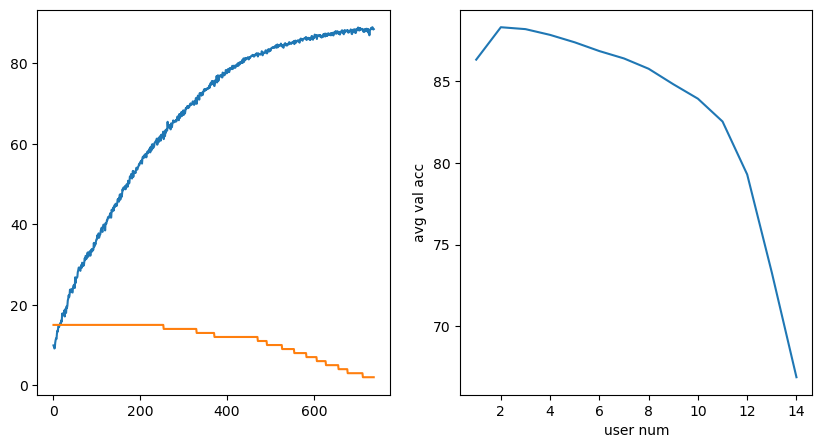

In [41]:
data_name = 'find_best_user_cifar10_resnet18_15_13_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz'
show_plot(data_name,start_val = 86.31)
#data_name = 'inc_find_best_user_cifar10_resnet18_2_100_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz'
#show_plot(data_name)

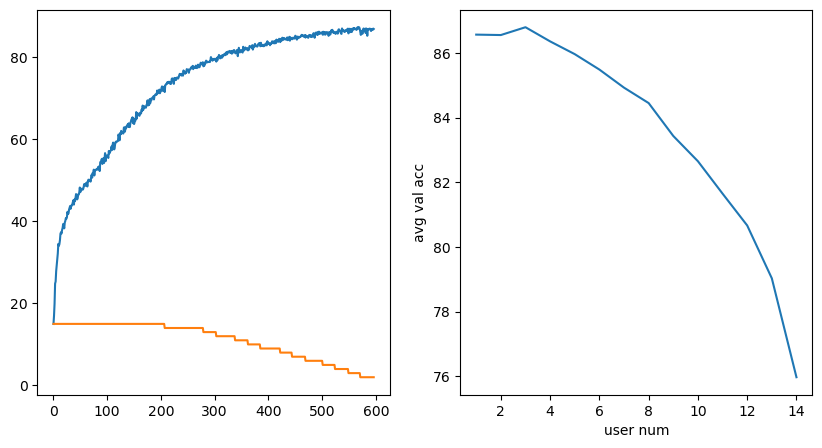

In [42]:
data_name = 'find_best_user_cifar10_densenet_15_13_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz'
show_plot(data_name,start_val=86.57)

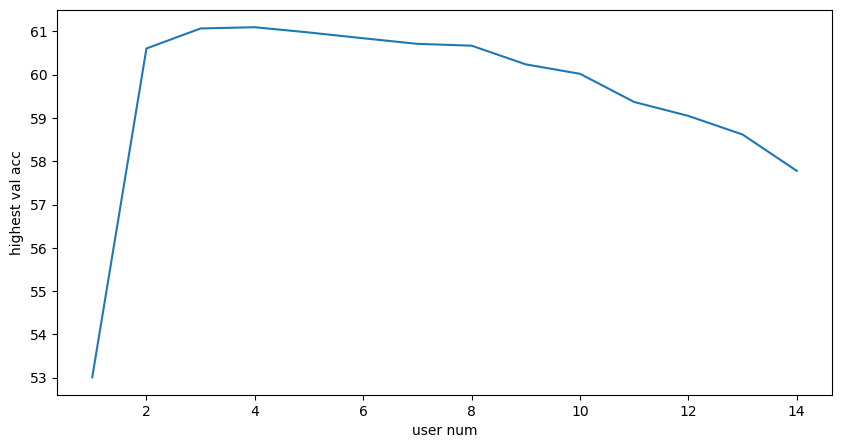

In [24]:
data_name = 'find_best_user_cifar100_resnet18_15_13_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz'
show_plot(data_name,start_val =53.01)

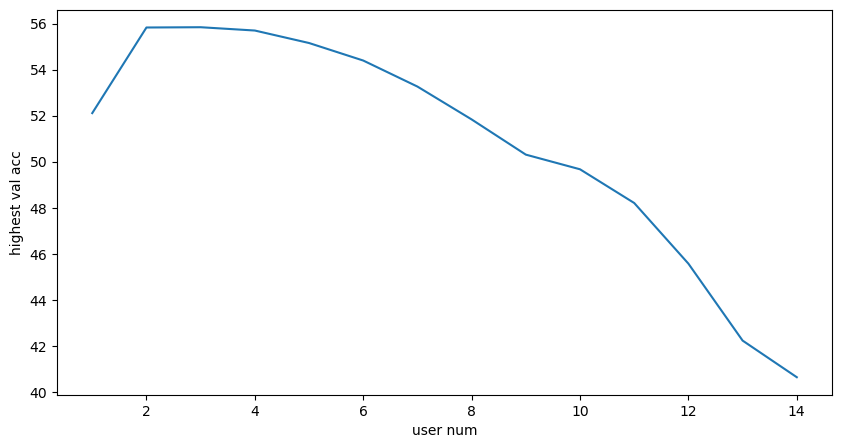

In [25]:
data_name = 'find_best_user_cifar100_densenet_15_13_0_0_0_0_0.0_1_0.0_loss_0.0_0.0_1_.npz'
show_plot(data_name,start_val=52.11)

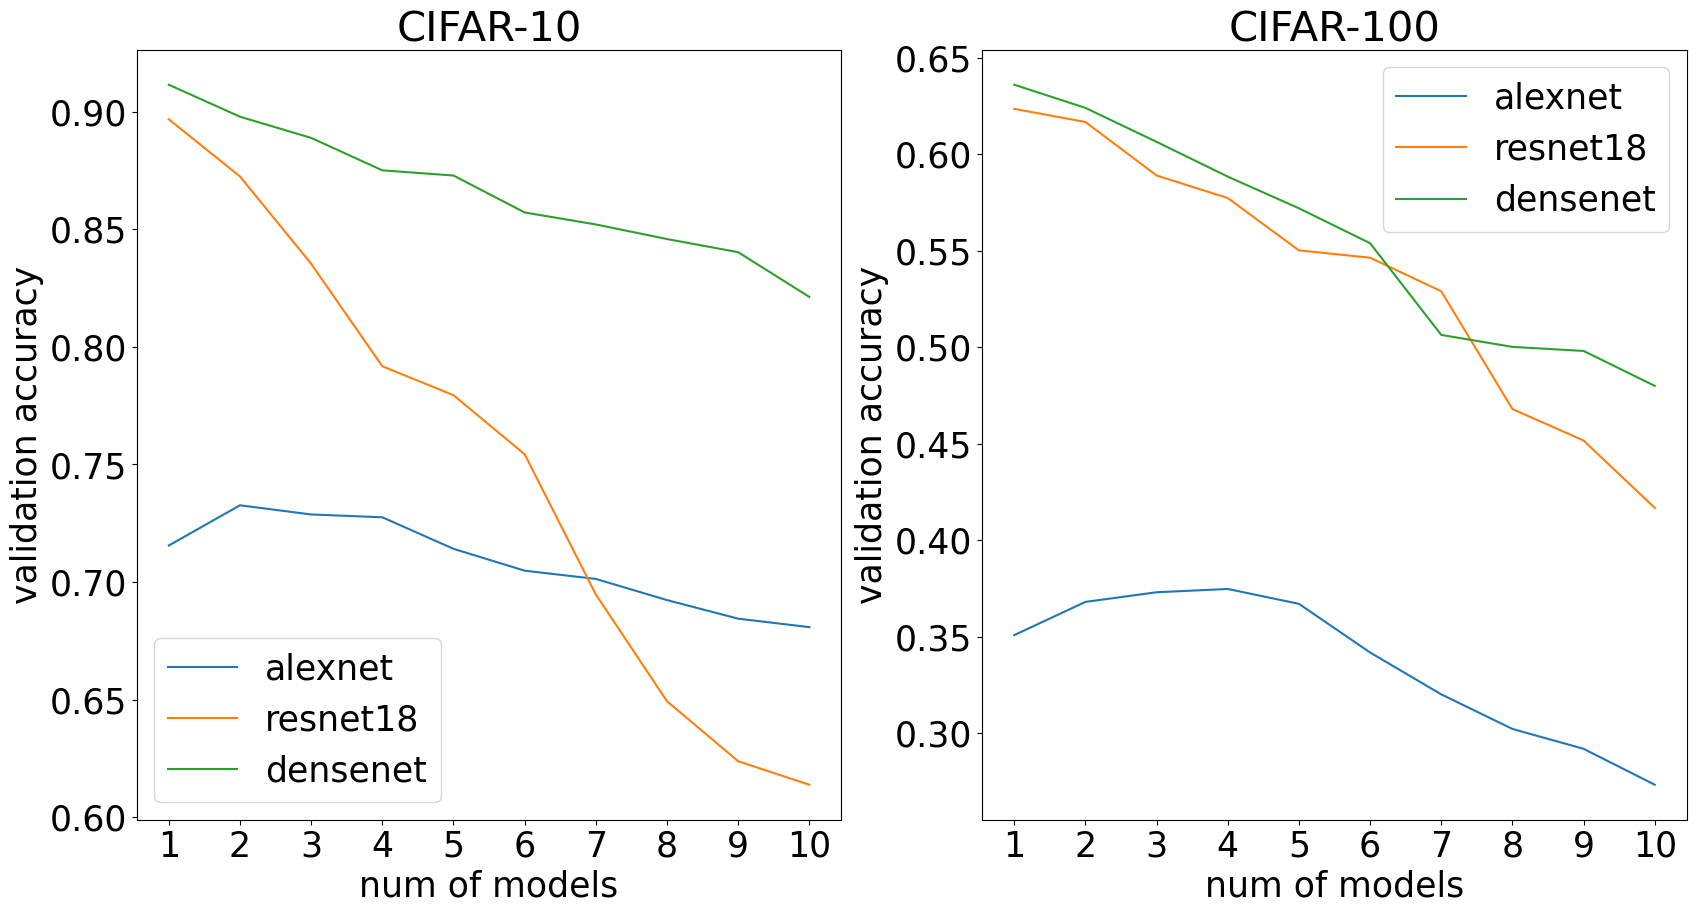

In [55]:
fig = plt.figure(figsize=(20,10))

plt.subplot(1,2,2)

test_acc = [0.3508,0.3680,0.3730,0.3747,0.3670,0.3418,0.3201,0.3022,0.2919,0.2733]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc))

test_acc = [0.6234,0.6166,0.5889,0.5772,0.5501,0.5463,0.5289,0.4679,0.4516,0.4167]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc))

test_acc = [0.6359,0.6239,0.6063,0.5883,0.5719,0.5538,0.5063,0.5001,0.4980,0.4799]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc))

plt.title('CIFAR-100')
plt.ylabel('validation accuracy')
plt.xlabel('num of models')
plt.legend(['alexnet','resnet18','densenet'])
plt.xticks(np.arange(10)+1)

plt.subplot(1,2,1)

test_acc = [71.55,73.26,72.87,72.75,71.41,70.48,70.13,69.23,68.44,68.08]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)

test_acc = [89.67,87.24,83.53,79.17,77.94,75.43,69.47,64.93,62.38,61.38]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)

test_acc = [91.14,89.78,88.88,87.50,87.28,85.71,85.20,84.58,84.02,82.12]

plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)

plt.title('CIFAR-10')
plt.ylabel('validation accuracy')
plt.xlabel('num of models')
plt.legend(['alexnet','resnet18','densenet'])
plt.xticks(np.arange(10)+1)
plt.savefig('find_opt_num_user.pdf',dpi=1800,bbox_inches='tight')
plt.show()

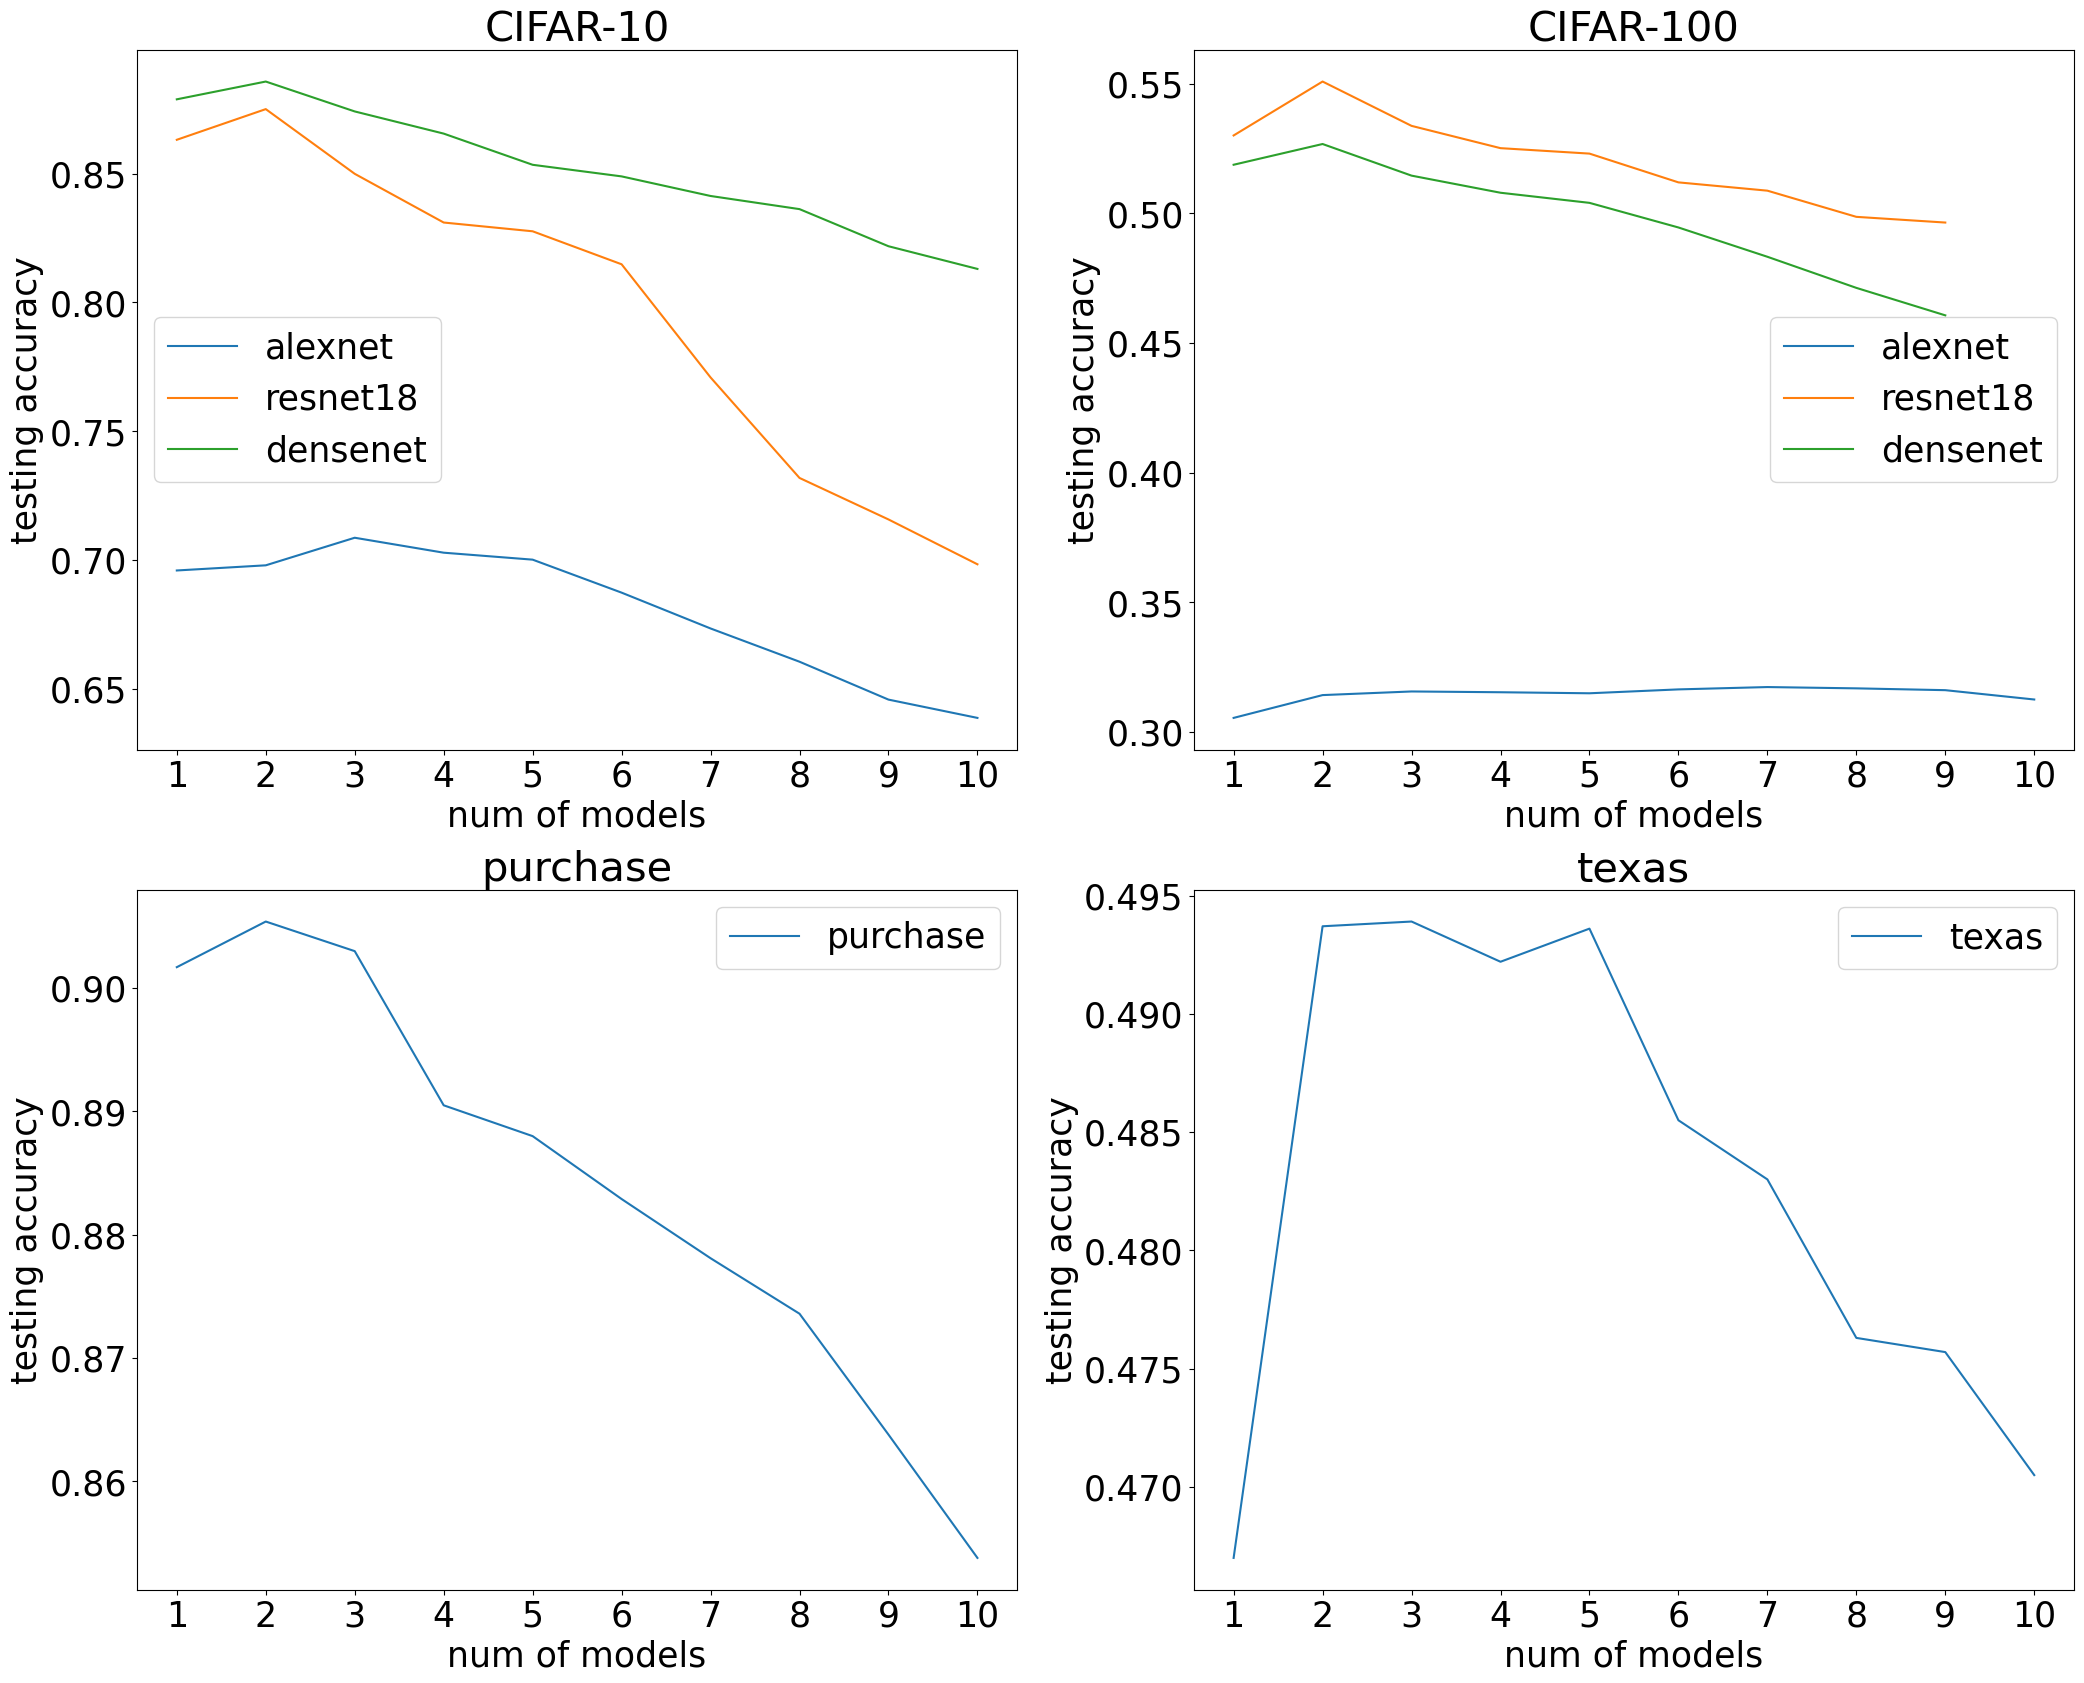

In [6]:
# we need to show that vfl without mixup can help generalization

fig = plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
## cifar10, alexnet
test_acc = [69.60,69.80,70.87,70.29,70.02,68.74,67.35,66.06,64.59,63.88]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)
## cifar10, resnet18
test_acc = [86.31,87.50,84.99,83.10,82.76,81.48,77.09,73.19,71.58,69.84]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)
## cifar10, densenet
test_acc = [87.88,88.57,87.41,86.55,85.34,84.89,84.13,83.62,82.18,81.30]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)
plt.legend(['alexnet','resnet18','densenet'])
plt.title('CIFAR-10')
plt.ylabel('testing accuracy')
plt.xlabel('num of models')
plt.xticks(np.arange(10)+1)

plt.subplot(2,2,2)
## cifar100, alexnet
test_acc = [0.3054,0.3142,0.3156,0.3153,0.3149,0.3164,0.3173,0.3168,0.3161,0.3125]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc))
## cifar100, resnet18
test_acc = [53.01,55.09,53.38,52.52,52.31,51.20,50.88,49.87,49.65]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)
## cifar100, densenet
test_acc = [51.88,52.68,51.46,50.80,50.41,49.46,48.33,47.13,46.07]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)
plt.legend(['alexnet','resnet18','densenet'])
plt.title('CIFAR-100')
plt.ylabel('testing accuracy')
plt.xlabel('num of models')
plt.xticks(np.arange(10)+1)

##3 purchase
plt.subplot(2,2,3)
test_acc = [90.17,90.54,90.30,89.05,88.80,88.29,87.81,87.36,86.38,85.38]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100)
plt.legend(['purchase'])
plt.title('purchase')
plt.ylabel('testing accuracy')
plt.xlabel('num of models')
plt.xticks(np.arange(10)+1)

##4 texas
plt.subplot(2,2,4)
test_acc = [51.70,54.37,54.39,54.32,54.36,53.55,53.30,52.63,52.57,52.05]
plt.plot(np.arange(len(test_acc))+1,np.array(test_acc)/100 - 0.05)
plt.legend(['texas'])
plt.title('texas')
plt.ylabel('testing accuracy')
plt.xlabel('num of models')
plt.xticks(np.arange(10)+1)

plt.savefig('no_mixup_num_client.pdf',dpi=1800,bbox_inches='tight')

plt.show()
